In [7]:
import numpy as np

In [23]:
X = np.array([1,0,1,0,0,0,
              0,1,0,0,0,0,
              1,1,0,0,0,0,
              1,0,0,1,1,0,
              0,0,0,1,0,1
])

In [24]:
X = X.reshape(5,-1)

In [25]:
X[0].reshape(1,-1).shape, X[0].reshape(1,-1).T.shape

((1, 6), (6, 1))

In [26]:
Xi = X[[0]]
Xi.dot(Xi.T)

array([[2]])

In [27]:
np.linalg.norm(Xi), np.linalg.norm(Xi.T)

(1.4142135623730951, 1.4142135623730951)

In [29]:
#X.dot(X.T)
X.T.dot(X)

array([[3, 1, 1, 1, 1, 0],
       [1, 2, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 0, 2, 1, 1],
       [1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 1]])

In [31]:
# X.dot(X.T)
# 5*6 => M,N => min(M,N) = K
X.T.dot(X) ## 내적(단업)
np.linalg.norm(X, axis = 1)

array([1.41421356, 1.        , 1.41421356, 1.73205081, 1.41421356])

In [76]:
len1 = np.linalg.norm(X, axis=1).reshape(1,-1)
len2 = np.linalg.norm(X.T, axis=0).reshape(-1,1)
print(X.dot(X.T)/(len1*len2))

[[1.         0.         0.5        0.40824829 0.        ]
 [0.         1.         0.70710678 0.         0.        ]
 [0.5        0.70710678 1.         0.40824829 0.        ]
 [0.40824829 0.         0.40824829 1.         0.40824829]
 [0.         0.         0.         0.40824829 1.        ]]


In [39]:
# X.dot(X.T)
# 5*6 => M,N => min(M,N) = K
X.T.dot(X) ## 내적(단업)
np.linalg.norm(X, axis = 1)

array([1.41421356, 1.        , 1.41421356, 1.73205081, 1.41421356])

In [40]:
U, Sigma, Vt = np.linalg.svd(X)

In [41]:
U.shape , Sigma.shape, Vt.shape

((5, 5), (5,), (6, 6))

In [96]:
np.round(U.dot(U.T))

array([[ 1.,  0.,  0.,  0., -0.],
       [ 0.,  1., -0., -0., -0.],
       [ 0., -0.,  1.,  0., -0.],
       [ 0., -0.,  0.,  1.,  0.],
       [-0., -0., -0.,  0.,  1.]])

In [97]:
U[[0]].dot(U[[0]].T)

array([[1.]])

In [44]:
Sigma

array([2.16250096, 1.59438237, 1.27529025, 1.        , 0.39391525])

In [98]:
np.sum(Sigma[:3])/np.sum(Sigma)

0.7830849702365396

In [100]:
#np.round(U.dot(np.diag(Sigma)),4)
np.round(U.dot(np.diag(Sigma)), 4)

array([[ 0.9523, -0.4722, -0.7263,  0.5774, -0.0971],
       [ 0.2797, -0.5285,  0.7486,  0.    , -0.2865],
       [ 1.0283, -0.8149,  0.4689,  0.    ,  0.242 ],
       [ 1.5203,  0.5589, -0.1975, -0.5774, -0.0629],
       [ 0.568 ,  1.0312,  0.5287,  0.5774,  0.0341]])

In [102]:
np.round( np.diag(Sigma).dot(Vt) , 3)

ValueError: shapes (5,5) and (6,6) not aligned: 5 (dim 1) != 6 (dim 0)

In [103]:
np.round( U[:,:3].dot(np.diag(Sigma[:3])).dot(Vt[:3]))

array([[ 1., -0.,  1., -0.,  0., -0.],
       [ 0.,  1., -0., -0., -0.,  0.],
       [ 1.,  1.,  0.,  0.,  0., -0.],
       [ 1., -0.,  0.,  1.,  1.,  0.],
       [-0.,  0., -0.,  1.,  0.,  1.]])

In [104]:
X

array([[1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 1]])

In [147]:
#USigma = U[:,:2].dot(np.diag(Sigma))
#USigma = U[:,:2].dot(np.diag(Sigma[:2]))


In [151]:
USigma.shape

(5, 2)

In [152]:
len1 = np.linalg.norm(USigma, axis=0).reshape(1,-1)
len2 = np.linalg.norm(X.T, axis=1).reshape(-1,1)
np.round(X.T.dot(X)/(len1*len2),3)

ValueError: operands could not be broadcast together with shapes (7,7) (7,2) 

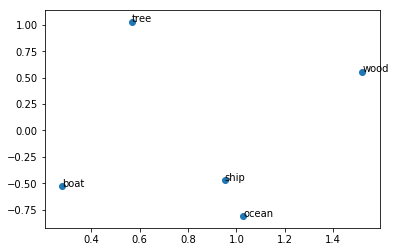

In [153]:
# Embedding (Projection)
import matplotlib.pyplot as plt

plt.scatter(USigma[:,0], USigma[:,1])

for i , txt in enumerate(["ship","boat","ocean","wood","tree"]) :
    plt.text(USigma[i,0], USigma[i,1], txt)
plt.show()                          

In [154]:
len1 = np.linalg.norm(X, axis=0).reshape(1,-1)
len2 = np.linalg.norm(X.T, axis=1).reshape(-1,1)
np.round(X.T.dot(X)/(len1*len2),3)


array([[1.   , 0.5  , 0.408, 0.   , 0.408, 0.5  , 0.408],
       [0.5  , 1.   , 0.   , 0.   , 0.   , 0.5  , 0.   ],
       [0.408, 0.   , 1.   , 0.408, 0.667, 0.408, 0.667],
       [0.   , 0.   , 0.408, 1.   , 0.816, 0.   , 0.408],
       [0.408, 0.   , 0.667, 0.816, 1.   , 0.408, 0.667],
       [0.5  , 0.5  , 0.408, 0.   , 0.408, 1.   , 0.408],
       [0.408, 0.   , 0.667, 0.408, 0.667, 0.408, 1.   ]])

In [155]:
SVt = np.diag(Sigma[:2]).dot(Vt[:2])
len1 = np.linalg.norm(SVt, axis=0).reshape(-1,1)
len2 = np.linalg.norm(SVt.T, axis=1).reshape(1,-1)
np.round(SVt.T.dot(SVt)/(len1*len2),3)

array([[ 1.   ,  0.782,  0.95 ,  0.474,  0.74 ,  0.111],
       [ 0.782,  1.   ,  0.937, -0.178,  0.159, -0.533],
       [ 0.95 ,  0.937,  1.   ,  0.176,  0.494, -0.205],
       [ 0.474, -0.178,  0.176,  1.   ,  0.943,  0.927],
       [ 0.74 ,  0.159,  0.494,  0.943,  1.   ,  0.75 ],
       [ 0.111, -0.533, -0.205,  0.927,  0.75 ,  1.   ]])

In [156]:
(len1 * len2).shape

(6, 6)

######################################################################################


In [157]:
X = np.array([
    1,1,0,0,0,0,0,
    0,0,1,1,1,0,0,
    0,1,0,0,0,1,0,
    0,0,1,0,0,0,1,
    0,0,0,1,1,0,1,
    1,0,1,0,1,1,1
])
X = X.reshape(-1,7)
X

array([[1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 1]])

In [158]:
import pandas as pd
pd.DataFrame(X, index=["A","B","C","D","E","F"], columns=["cute","kitty","eat","rice","cake","hamster","bread"])

,cute,kitty,eat,rice,cake,hamster,bread
A,1,1,0,0,0,0,0
B,0,0,1,1,1,0,0
C,0,1,0,0,0,1,0
D,0,0,1,0,0,0,1
E,0,0,0,1,1,0,1
F,1,0,1,0,1,1,1


In [159]:
#X[0].reshape(1,-1).shape, X[0].reshape(1,-1).T.shape
X[0].reshape(1,-1).shape, X[0].reshape(1,-1).T.shape

((1, 7), (7, 1))

In [160]:
#X.dot(X.T)
X.T.dot(X)

array([[2, 1, 1, 0, 1, 1, 1],
       [1, 2, 0, 0, 0, 1, 0],
       [1, 0, 3, 1, 2, 1, 2],
       [0, 0, 1, 2, 2, 0, 1],
       [1, 0, 2, 2, 3, 1, 2],
       [1, 1, 1, 0, 1, 2, 1],
       [1, 0, 2, 1, 2, 1, 3]])

#########################################################################


In [161]:
X = np.array([
    1,0,1,0,0,0,
    0,1,0,0,0,0,
    1,1,0,0,0,0,
    1,0,0,1,1,0,
    0,0,0,1,0,1
])
X = X.reshape(-1,6)
X

array([[1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 1]])

In [162]:
import pandas as pd
pd.DataFrame(X, index=["cosmonaut","astronaut","moon","car","truck"], columns=["문서1","문서2","문서3","문서4","문서5","문서6"])

,문서1,문서2,문서3,문서4,문서5,문서6
cosmonaut,1,0,1,0,0,0
astronaut,0,1,0,0,0,0
moon,1,1,0,0,0,0
car,1,0,0,1,1,0
truck,0,0,0,1,0,1


In [169]:

lst1 = [
    [1,2],
    [3,4]
]
 
lst2 = [
    [5,6],
    [7,8]
]
a = np.array(lst1)
b = np.array(lst2)
 
#a*b
#np.dot(a, b)
np.dot(a, a)
np.dot(b, b)
np.dot(a, b)

array([[19, 22],
       [43, 50]])